DATA IMPORTING

In [ ]:
import tensorflow as tf
import numpy as np
import csv
import random
import pandas as pd


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
# from google.colab import drive
# drive.mount('/content/drive') 

In [ ]:
np.random.seed(100)
tf.random.set_seed(100)
random.seed(100)

In [ ]:
data = [] 

with open('dta_df.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader) 
  for row in reader:
      triplet = []
      triplet.append(row[0])
      triplet.append(row[1])
      triplet.append(float(row[2]))
      data.append(triplet)
len(data)      

23785

In [ ]:
data[10] 

['CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C4)C(=O)NC5CCN(CC5)C)OC)C',
 'MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPV

In [ ]:
smiles = []
proteins = []
labels = []
random.shuffle(data)

for triplet in range(len(data)):
  smiles.append(data[triplet][0])
  proteins.append(data[triplet][1])
  labels.append(data[triplet][2])

In [ ]:
print(smiles[10])
print(proteins[10])
print(labels[10])

CC12C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)(CO)O
MVSWGRFICLVVVTMATLSLARPSFSLVEDTTLEPEEPPTKYQISQPEVYVAAPGESLEVRCLLKDAAVISWTKDGVHLGPNNRTVLIGEYLQIKGATPRDSGLYACTASRTVDSETWYFMVNVTDAISSGDDEDDTDGAEDFVSENSNNKRAPYWTNTEKMEKRLHAVPAANTVKFRCPAGGNPMPTMRWLKNGKEFKQEHRIGGYKVRNQHWSLIMESVVPSDKGNYTCVVENEYGSINHTYHLDVVERSPHRPILQAGLPANASTVVGGDVEFVCKVYSDAQPHIQWIKHVEKNGSKYGPDGLPYLKVLKAAGVNTTDKEIEVLYIRNVTFEDAGEYTCLAGNSIGISFHSAWLTVLPAPGREKEITASPDYLEIAIYCIGVFLIACMVVTVILCRMKNTTKKPDFSSQPAVHKLTKRIPLRRQVTVSAESSSSMNSNTPLVRITTRLSSTADTPMLAGVSEYELPEDPKWEFPRDKLTLGKPLGEGCFGQVVMAEAVGIDKDKPKEAVTVAVKMLKDDATEKDLSDLVSEMEMMKMIGKHKNIINLLGACTQDGPLYVIVEYASKGNLREYLRARRPPGMEYSYDINRVPEEQMTFKDLVSCTYQLARGMEYLASQKCIHRDLAARNVLVTENNVMKIADFGLARDINNIDYYKKTTNGRLPVKWMAPEALFDRVYTHQSDVWSFGVLMWEIFTLGGSPYPGIPVEELFKLLKEGHRMDKPANCTNELYMMMRDCWHAVPSQRPTFKQLVEDLDRILTLTTNEEYLDLSQPLEQYSPSYPDTRSSCSSGDDSVFSPDPMPYEPCLPQYPHINGSVKT
6.180456064458132


In [ ]:
split = int(0.8 * len(smiles))
train_smiles = smiles[:split]
test_smiles = smiles[split:]
train_proteins = proteins[:split]
test_proteins = proteins[split:]
train_labels = labels[:split]
test_labels = labels[split:]

In [ ]:
tokenizer_smiles = Tokenizer(char_level = True)
tokenizer_smiles.fit_on_texts(train_smiles)

word_index_smiles = tokenizer_smiles.word_index
vocab_size_smiles = len(word_index_smiles)

train_sequences_smiles = tokenizer_smiles.texts_to_sequences(train_smiles)
train_padded_smiles = pad_sequences(train_sequences_smiles, truncating = "post", padding = "post", maxlen = 85) 

test_sequences_smiles = tokenizer_smiles.texts_to_sequences(test_smiles)
test_padded_smiles = pad_sequences(test_sequences_smiles, truncating = "post", padding = "post", maxlen = 85) 

In [ ]:
tokenizer_proteins = Tokenizer(char_level = True)
tokenizer_proteins.fit_on_texts(train_proteins)

word_index_proteins = tokenizer_proteins.word_index
vocab_size_proteins = len(word_index_proteins)

train_sequences_proteins = tokenizer_proteins.texts_to_sequences(train_proteins)
train_padded_proteins = pad_sequences(train_sequences_proteins, truncating = "post", padding = "post", maxlen = 1200) 

test_sequences_proteins = tokenizer_proteins.texts_to_sequences(test_proteins)
test_padded_proteins = pad_sequences(test_sequences_proteins, truncating = "post", padding = "post", maxlen = 1200) 

In [ ]:
print(vocab_size_smiles) 
print(vocab_size_proteins) 

22
20


In [ ]:
train_smiles_array = np.array(train_padded_smiles)
test_smiles_array = np.array(test_padded_smiles)
train_proteins_array = np.array(train_padded_proteins)
test_proteins_array = np.array(test_padded_proteins)
train_labels_array = np.array(train_labels, dtype = "float32")
test_labels_array = np.array(test_labels, dtype = "float32")

print(f"Train smiles array shape: {train_smiles_array.shape}")
print(f"Test smiles array shape: {test_smiles_array.shape}")
print(f"Train proteins array shape: {train_proteins_array.shape}")
print(f"Test proteins array shape: {test_proteins_array.shape}")
print(f"Train labels array shape: {train_labels_array.shape}")
print(f"Test labels array shape: {test_labels_array.shape}")

Train smiles array shape: (19028, 85)
Test smiles array shape: (4757, 85)
Train proteins array shape: (19028, 1200)
Test proteins array shape: (4757, 1200)
Train labels array shape: (19028,)
Test labels array shape: (4757,)


MODEL

In [ ]:
from keras.layers import Input, Embedding, Concatenate, Conv1D, GlobalAveragePooling1D, Dense, Dropout, Bidirectional, LSTM, Flatten, GlobalMaxPooling1D
from keras.models import Model

smile_input = Input((85,)) 
protein_input = Input((1200,)) 

embed_smiles = Embedding(vocab_size_smiles, 128, input_length=85)(smile_input)
conv_smiles = Conv1D(32, 4, activation = "relu")(embed_smiles)
conv_smiles = Conv1D(64, 6, activation = "relu")(conv_smiles)
conv_smiles = Conv1D(96, 8, activation = "relu")(conv_smiles)
max_smiles = GlobalMaxPooling1D()(conv_smiles)

embed_protein = Embedding(vocab_size_proteins+1, 128, input_length=1200)(protein_input)
conv_protein = Conv1D(32, 4, activation = "relu")(embed_protein)
conv_protein = Conv1D(64, 8, activation = "relu")(conv_protein)
conv_protein = Conv1D(96, 12, activation = "relu")(conv_protein)
max_protein = GlobalMaxPooling1D()(conv_protein)

concat_layer = Concatenate()([max_smiles, max_protein])

output = Dense(1024, activation = "relu")(concat_layer)
output = Dropout(0.1)(output)
output = Dense(1024, activation = "relu")(output)
output = Dropout(0.1)(output)
output = Dense(512, activation = "relu")(output)
output = Dense(1)(output)

model = Model(inputs = [smile_input, protein_input], outputs = output)

In [ ]:
optimizer = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='mse', optimizer = optimizer, metrics=['mse'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 85)]         0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1200)]       0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 85, 128)      2816        ['input_5[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 1200, 128)    2688        ['input_6[0][0]']                
                                                                                            

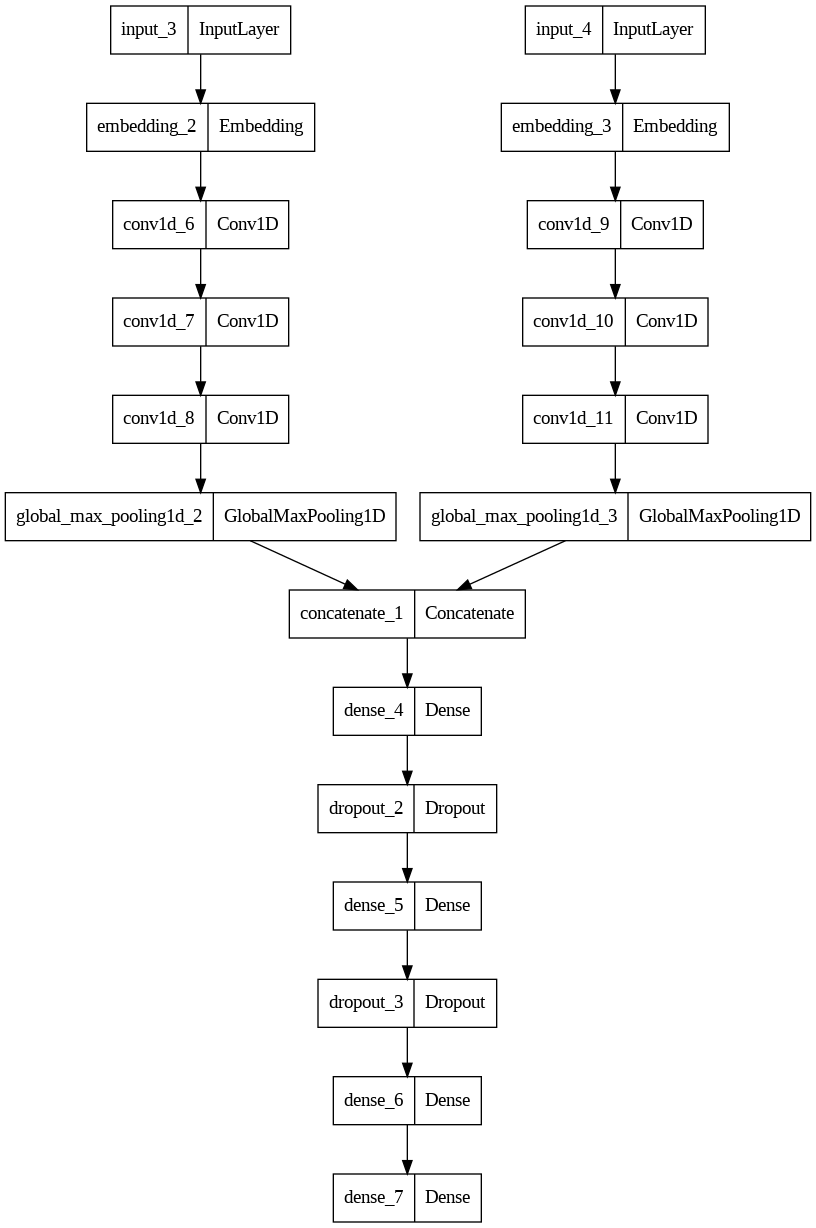

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True,
)

history = model.fit([train_smiles_array, train_proteins_array], train_labels_array, 
                    epochs = 1, batch_size = 256, validation_data = ([test_smiles_array, test_proteins_array], test_labels_array), callbacks = [early_stopping])

Epoch 1/10
84/84 [==============================] - 510s 6s/step - loss: 1.8377 - mse: 1.8377 - val_loss: 0.4569 - val_mse: 0.4569
Epoch 2/10
84/84 [==============================] - 527s 6s/step - loss: 0.4985 - mse: 0.4985 - val_loss: 0.4396 - val_mse: 0.4396
Epoch 3/10
84/84 [==============================] - 545s 6s/step - loss: 0.4859 - mse: 0.4859 - val_loss: 0.4223 - val_mse: 0.4223
Epoch 4/10
84/84 [==============================] - 529s 6s/step - loss: 0.4829 - mse: 0.4829 - val_loss: 0.4118 - val_mse: 0.4118
Epoch 5/10
84/84 [==============================] - 532s 6s/step - loss: 0.4964 - mse: 0.4964 - val_loss: 0.4690 - val_mse: 0.4690
Epoch 6/10
84/84 [==============================] - 531s 6s/step - loss: 0.4837 - mse: 0.4837 - val_loss: 0.4114 - val_mse: 0.4114
Epoch 7/10
84/84 [==============================] - 531s 6s/step - loss: 0.4558 - mse: 0.4558 - val_loss: 0.4288 - val_mse: 0.4288
Epoch 8/10
84/84 [==============================] - 532s 6s/step - loss: 0.4652 - m

<Figure size 640x480 with 0 Axes>

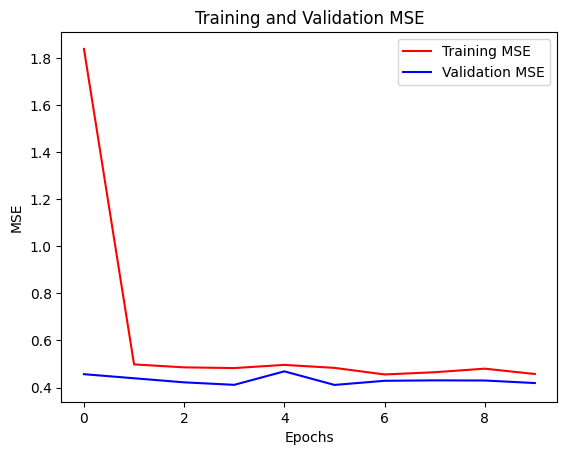

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

mse=history.history['mse']
val_mse=history.history['val_mse']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(mse)) 

plt.plot(epochs, mse, 'r')
plt.plot(epochs, val_mse, 'b')
plt.title('Training and Validation MSE')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["Training MSE", "Validation MSE"])

plt.figure()